In [12]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

In [3]:
df = pd.read_csv("long_ghosts_data.csv", sep=';')
df["ghost_perc"] = df["super_ghosts"]/df["pop_size"]

In [4]:
df

,Unnamed: 0,nb_segments,nb_ancestors,super_ghosts,first_commom_anc,all_common_anc,back_time,pop_size,chrsm_len,recomb,rep,ghost_perc
0,0,40000,20000,0,12,27,0,20000,5000,10,4,0.00
1,1,172863,17333,0,12,27,1,20000,5000,10,4,0.00
2,2,229264,16356,0,12,27,2,20000,5000,10,4,0.00
3,3,263093,16122,0,12,27,3,20000,5000,10,4,0.00
4,4,285500,16072,0,12,27,4,20000,5000,10,4,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1394995,4995,405,15,0,3,9,4995,20,100000,10,2,0.00
1394996,4996,401,14,0,3,9,4996,20,100000,10,2,0.00
1394997,4997,401,15,1,3,9,4997,20,100000,10,2,0.05
1394998,4998,396,18,2,3,9,4998,20,100000,10,2,0.10


# Work with average data

In [5]:
avg_df = pd.DataFrame()
for recomb in df["recomb"].unique():
    for pop_size in df["pop_size"].unique():
        for chrsm_len in df["chrsm_len"].unique():
            for rep in df["rep"].unique():
                tmp = df[
                    (df["recomb"] == recomb) &
                    (df["pop_size"] == pop_size) &
                    (df["chrsm_len"] == chrsm_len) &
                    (df["rep"] == rep)
                ]
            if not tmp.empty:
                    tmp_avg = pd.DataFrame()
                    tmp_avg["recomb"] = [recomb]
                    tmp_avg["pop_size"] = [pop_size]
                    tmp_avg["chrsm_len"] = [chrsm_len]
                    tmp_avg["rep"] = [rep]
                    tmp_avg["ghost_perc"] = np.mean(tmp[tmp["back_time"]>3500]["ghost_perc"])
                    tmp_avg["first_commom_anc"] = tmp["first_commom_anc"].unique()[0]
                    tmp_avg["all_common_anc"] = tmp["all_common_anc"].unique()[0]
                    tmp_avg["nb_ancestors"] = np.mean(tmp[tmp["back_time"]>3500]["nb_ancestors"])
                    tmp_avg["nb_segments"] = np.mean(tmp[tmp["back_time"]>3500]["nb_segments"])
                    avg_df = pd.concat([avg_df,tmp_avg])
avg_df      

,recomb,pop_size,chrsm_len,rep,ghost_perc,first_commom_anc,all_common_anc,nb_ancestors,nb_segments
0,10,20000,5000,0,0.165190,12,25,15934.396931,7.796642e+04
0,10,20000,10000000,0,0.099937,12,26,15935.685123,3.986388e+05
0,10,20000,100000,0,0.103156,12,25,15938.706471,3.302170e+05
0,10,1000,5000,0,0.140348,8,17,796.625751,5.085292e+03
0,10,1000,4000000000,0,0.092478,8,22,796.947965,2.000892e+04
0,10,1000,10000000,0,0.092531,8,17,797.186791,1.989546e+04
0,10,1000,100000,0,0.096622,8,18,797.308873,1.755909e+04
0,10,20,5000,0,0.029353,3,7,16.393596,3.847939e+02
0,10,20,4000000000,0,0.030187,4,8,16.392262,4.203135e+02
0,10,20,10000000,0,0.028352,3,7,16.400934,4.151101e+02


In [8]:
avg_df["logpop"] = [math.log(pop) for pop in avg_df["pop_size"]]
avg_df["logchrsmlen"] = [math.log(pop) for pop in avg_df["chrsm_len"]]

<IPython.core.display.Javascript object>


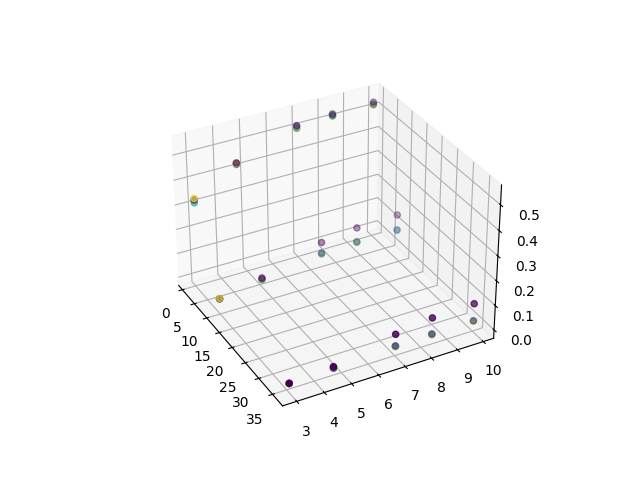

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

n = 100


ax.scatter(avg_df["recomb"],
          avg_df["logpop"],
          avg_df["ghost_perc"],
          c=avg_df["logchrsmlen"])

ax.set_xlabel('Nb recomb per chrsm')
ax.set_ylabel('Log pop size')
ax.set_zlabel('go')

plt.show()

In [ ]:
avg_df.plot.scatter(x ="recomb",
                   y = "ghost_perc",
                   c = "logchrsmlen",
                    colormap="Set1")

plt.ylabel("average ghost %")
plt.xlabel("population size")
plt.yscale("log")
plt.grid()
plt.show()

In [ ]:
avg_df.plot.scatter(x ="pop_size",
                   y = "ghost_perc",
                   c = "recomb",
                    colormap="viridis")

plt.ylabel("average ghost %")
plt.xlabel("population size")
plt.title("x = pop size")
plt.yscale("log")
plt.grid()
plt.show()

In [ ]:
avg_df.plot.scatter(x ="chrsm_len",
                   y = "ghost_perc",
                   c = "recomb",
                    colormap="viridis")

plt.ylabel("average ghost %")
plt.xlabel("population size")
plt.title("x = chrsm len")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.show()

In [ ]:
avg_df[avg_df["recomb"]==36].plot.scatter(x ="chrsm_len",
                   y = "nb_segments",
                   c = "logpop",
                    colormap="viridis")

plt.ylabel("nb segments")
plt.xlabel("population size")
plt.title("x = chrsm len")
plt.yscale("log")
plt.xscale("log")
plt.grid()
plt.show()

In [ ]:
avg_df[avg_df["pop_size"]==20000].plot.scatter(x ="recomb",
                   y = "nb_ancestors",
                   c = "chrsm_len",
                    colormap="viridis")

plt.ylabel("nb of ancestors")
plt.xlabel("recomb")
#plt.yscale("log")
plt.show()

In [ ]:
avg_df.plot.scatter(x ="recomb",
                   y = "nb_segments",
                   c = "logchrsmlen",
                    colormap="viridis")

plt.ylabel("nb of segments")
plt.xlabel("recomb")
#plt.yscale("log")
plt.grid()
plt.show()

In [ ]:
avg_df.plot.scatter(x ="pop_size",
                   y = "first_commom_anc",
                    colormap="viridis",
                   alpha=.2)

plt.ylabel("first common anc")
plt.xlabel("population size")
plt.xscale("log")
plt.show()

In [ ]:
avg_df.plot.scatter(x ="pop_size",
                   y = "all_common_anc",
                   alpha=0.2)

plt.ylabel("all common anc")
plt.xlabel("population size")
plt.xscale("log")
plt.grid()
plt.show()

# Work with temporal data

In [ ]:
colors = ["tab:blue","tab:orange",
         "tab:green","tab:purple",
         "tab:red","tab:pink",
         "tab:brown", "tab:purple"]

pop_sizes = df["pop_size"].unique()
pop_sizes.sort()
for r in df["recomb"].unique():
    f, ax = plt.subplots(1, figsize=(12,10))
    for i,pop in enumerate(pop_sizes):
        tmp = df[(df["recomb"]==r)
                  &(df["pop_size"]==pop)]

        Mean = tmp.groupby("back_time")["ghost_perc"].mean()
        Std = tmp.groupby("back_time")["ghost_perc"].std()

        ax.plot(tmp["back_time"].unique(),
                 Mean,
                label = "pop "+str(pop),
                color=colors[i],
                alpha=.8
        )
        ax.fill_between(tmp["back_time"].unique(),
                Mean - Std, Mean + Std,
                color=colors[i],
                alpha=.2
        )

    plt.legend()
    #plt.xscale("log")
    plt.grid()
    plt.xlabel("Generations")
    plt.ylabel("% of super ghosts")
    plt.title("% ghosts across time, recombination is "+str(r))
    plt.show()

In [ ]:
colors = ["tab:blue","tab:orange",
         "tab:green","tab:purple",
         "tab:red","tab:pink",
         "tab:brown", "tab:purple"]

pop_sizes = df["pop_size"].unique()
pop_sizes.sort()
for r in df["recomb"].unique():
    for clen in df["chrsm_len"].unique():
        f, ax = plt.subplots(1, figsize=(12,10))
        for i,pop in enumerate(pop_sizes):
            tmp = df[(df["recomb"]==r)
                      &(df["pop_size"]==pop)
                     & (df["chrsm_len"]==clen)
                      ]

            Mean = tmp.groupby("back_time")["nb_segments"].mean()
            Std = tmp.groupby("back_time")["nb_segments"].std()

            ax.plot(tmp["back_time"].unique(),
                     Mean,
                    label = "pop "+str(pop),
                    color=colors[i]
            )
            ax.fill_between(tmp["back_time"].unique(),
                    Mean - Std, Mean + Std,
                    color=colors[i],
                    alpha=.3
            )

        plt.legend()
        #plt.xscale("log")
        plt.grid()
        plt.xlabel("Generations")
        plt.ylabel("nb of segments")
        #plt.xlim(1,4000)
        plt.title("nb seg across time, recomb = "+str(r)+" len = "+str(clen))
        plt.show()

In [ ]:
colors = ["tab:blue","tab:orange",
         "tab:green","tab:purple",
         "tab:red","tab:pink",
         "tab:brown", "tab:purple"]

pop_sizes = df["pop_size"].unique()
pop_sizes.sort()
for r in df["recomb"].unique():
    f, ax = plt.subplots(1, figsize=(12,10))
    for i,pop in enumerate(pop_sizes):
        tmp = df[(df["recomb"]==r)
                  &(df["pop_size"]==pop)
                  ]

        Mean = tmp.groupby("back_time")["nb_ancestors"].mean()
        Std = tmp.groupby("back_time")["nb_ancestors"].std()

        ax.plot(tmp["back_time"].unique(),
                 Mean,
                label = "pop "+str(pop),
                color=colors[i]
        )
        ax.fill_between(tmp["back_time"].unique(),
                Mean - Std, Mean + Std,
                color=colors[i],
                alpha=.3
        )

    plt.legend()
    plt.xscale("log")
    plt.grid()
    plt.xlabel("Generations")
    plt.ylabel("nb of anc")
    #plt.xlim(1,4000)
    plt.title("nb anc across time, recomb = "+str(r))
    plt.show()

In [ ]:
colors = ["tab:blue","tab:orange",
         "tab:green","tab:purple",
         "tab:red","tab:pink",
         "tab:brown", "tab:purple"]

chrsm_len = df["chrsm_len"].unique()
chrsm_len.sort()
for r in df["recomb"].unique():
    f, ax = plt.subplots(1, figsize=(12,10))
    for i,chrsmlen in enumerate(chrsm_len):
        tmp = df[(df["recomb"]==r)
                  &(df["chrsm_len"]==chrsmlen)
                  ]

        Mean = tmp.groupby("back_time")["nb_segments"].mean()
        Std = tmp.groupby("back_time")["nb_segments"].std()

        ax.plot(tmp["back_time"].unique(),
                 Mean,
                label = "chrsm_len "+str(chrsmlen),
                color=colors[i]
        )
        ax.fill_between(tmp["back_time"].unique(),
                Mean - Std, Mean + Std,
                color=colors[i],
                alpha=.3
        )

    plt.legend()
    plt.xscale("log")
    plt.grid()
    plt.xlabel("Generations")
    plt.ylabel("nb of segments")
    #plt.xlim(1,4000)
    plt.title("nb seg across time, recomb = "+str(r))
    plt.show()